#Step 1: Setting Up the Environment


In [ ]:
!pip install pyspark
!pip install mysql-connector-python
!pip install jaydebeapi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=d53f98fe333eda569e7f84da2b7fa10bcd079f225e7b7a533c1b5cb29b35b60f
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 9.1 MB/s eta 0:00:00


#Step 2: Initialize PySpark Session


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Big Data Pipeline") \
    .getOrCreate()

#Step 3: Load the CSV Data into a PySpark DataFrame


In [ ]:
# Read data from CSV
df = spark.read.csv("/content/sample_data/Dataset_csv.csv", header=True, inferSchema=True)
df.show(5)
df.count()

+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|       569208|2019/10/02|    22090|Paper Bunting Ret...|13.27|       2|     16693|United Kingdom|
|       574994|2019/11/08|    22817|  Card Suki Birthday|10.68|      12|     17870|United Kingdom|
|       578270|2019/11/23|    22141|Christmas Craft T...| 6.13|       2|     14096|United Kingdom|
|       567619|2019/09/21|    22383|Lunch Bag Suki De...| 5.97|      10|     15203|United Kingdom|
|       577009|2019/11/17|    21484|Chick Grey Hot Wa...|14.61|       4|     12749|United Kingdom|
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
only showing top 5 rows



100000

In [ ]:
df.show(5)
df.count()

+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|       569208|2019/10/02|    22090|Paper Bunting Ret...|13.27|       2|     16693|United Kingdom|
|       574994|2019/11/08|    22817|  Card Suki Birthday|10.68|      12|     17870|United Kingdom|
|       578270|2019/11/23|    22141|Christmas Craft T...| 6.13|       2|     14096|United Kingdom|
|       567619|2019/09/21|    22383|Lunch Bag Suki De...| 5.97|      10|     15203|United Kingdom|
|       577009|2019/11/17|    21484|Chick Grey Hot Wa...|14.61|       4|     12749|United Kingdom|
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
only showing top 5 rows



100000

#Step 4: Data Cleaning

In [ ]:
# Remove duplicates
df = df.dropDuplicates()
df.count()

99798

In [ ]:
from pyspark.sql.functions import col

df = df.filter(col("Quantity") >= 0)

# Show the filtered DataFrame
print("Filtered DataFrame (No Negative Quantities):")
df.show()
df.count()

Filtered DataFrame (No Negative Quantities):
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|       581469|2019/12/08|    22320|Birds Mobile Vint...| 6.19|       1|     14606|United Kingdom|
|       558703|2019/07/01|    22028|Penny Farthing Bi...|10.68|      12|     13730|United Kingdom|
|       538255|2018/12/10|    22800|Antique Tall Swir...|14.09|       4|     14911|          EIRE|
|       574722|2019/11/06|    21171| Bathroom Metal Sign|10.81|       4|     14502|United Kingdom|
|       541422|2019/01/17|    20711|      Jumbo Bag Toys| 7.24|       4|     12422|     Australia|
|       562733|2019/08/09|    22408|Money Box Confect...|11.53|      12|     14626|United Kingdom|
|       570713|2019/10/12|    71053|White Moroccan Me...|14.09| 

98193

#Counting Null Values for Each Column

In [ ]:
from pyspark.sql.functions import col, sum

# Count nulls in each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()


+-------------+----+---------+-----------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+-----+--------+----------+-------+
|            0|   0|        0|          0|    0|       0|         0|      0|
+-------------+----+---------+-----------+-----+--------+----------+-------+



#Step 5: Schema Normalization

In [ ]:
  # Extract Products
  products = df.select("ProductNo", "ProductName", "Price").distinct()

  # Extract Customers
  customers = df.select("CustomerNo", "Country").distinct()

  # Extract Transactions
  transactions = df.select("TransactionNo", "Date", "ProductNo", "Quantity", "CustomerNo")

In [ ]:
products.show(5)

+---------+--------------------+-----+
|ProductNo|         ProductName|Price|
+---------+--------------------+-----+
|    21843|Red Retrospot Cak...|21.47|
|    21481|Fawn Blue Hot Wat...|14.09|
|    22355|Charlotte Bag Suk...|11.12|
|    21756|Bath Building Blo...|16.35|
|    23283|Doormat Vintage Leaf|26.43|
+---------+--------------------+-----+
only showing top 5 rows



In [ ]:
customers.show(5)

+----------+--------------+
|CustomerNo|       Country|
+----------+--------------+
|     14667|United Kingdom|
|     15861|United Kingdom|
|     15374|United Kingdom|
|     15869|United Kingdom|
|     12600|       Germany|
+----------+--------------+
only showing top 5 rows



In [ ]:
transactions.show(5)

+-------------+----------+---------+--------+----------+
|TransactionNo|      Date|ProductNo|Quantity|CustomerNo|
+-------------+----------+---------+--------+----------+
|       581469|2019/12/08|    22320|       1|     14606|
|       558703|2019/07/01|    22028|      12|     13730|
|       538255|2018/12/10|    22800|       4|     14911|
|       574722|2019/11/06|    21171|       4|     14502|
|       541422|2019/01/17|    20711|       4|     12422|
+-------------+----------+---------+--------+----------+
only showing top 5 rows



#Step 6: Data Processing
Perform any further processing such as aggregations, calculations, or transformations.

In [ ]:
from pyspark.sql.functions import sum as spark_sum, round

# Calculate total quantity and total sales
product_sales = df.groupBy("ProductNo").agg(
    spark_sum("Quantity").alias("TotalQuantity"),
    (spark_sum("Quantity") * spark_sum("Price")).alias("TotalSales")
)

# Round TotalSales to 2 decimal places
product_sales = product_sales.withColumn("TotalSales", round(col("TotalSales"), 2))

# Show the result
product_sales.show()

+---------+-------------+----------+
|ProductNo|TotalQuantity|TotalSales|
+---------+-------------+----------+
|    22728|          581|1210193.95|
|    21889|         1766|2158528.82|
|    23318|          939| 835447.08|
|    21259|          361| 377710.69|
|    21249|          117|  37782.81|
|    22121|          112|  63495.04|
|    90022|            6|    374.04|
|    22596|          610|  357209.9|
|    21452|          246|  130281.6|
|    22254|           81|  14511.15|
|    21894|           59|   19198.6|
|    20868|          111|   9403.92|
|    21248|           20|    2346.0|
|   90026D|            1|     18.96|
|    90143|           11|    795.74|
|   90197B|            3|    111.03|
|    23459|            3|    138.36|
|   90210B|           10|     112.7|
|    21671|          776|  682880.0|
|    21535|          345|  302772.0|
+---------+-------------+----------+
only showing top 20 rows



#Changing "Date" column datatype from sting to date

In [ ]:
from pyspark.sql.functions import to_date, date_format
# Convert the string to a date type with the original format
df = df.withColumn("Date", to_date(col("Date"), "yyyy/MM/dd"))

# Format the date column to the desired format
df = df.withColumn("Date", date_format(col("Date"), "yyyy-MM-dd"))

# Show the updated DataFrame
df.show()

+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+
|       581469|2019-12-08|    22320|Birds Mobile Vint...| 6.19|       1|     14606|United Kingdom|
|       558703|2019-07-01|    22028|Penny Farthing Bi...|10.68|      12|     13730|United Kingdom|
|       538255|2018-12-10|    22800|Antique Tall Swir...|14.09|       4|     14911|          EIRE|
|       574722|2019-11-06|    21171| Bathroom Metal Sign|10.81|       4|     14502|United Kingdom|
|       541422|2019-01-17|    20711|      Jumbo Bag Toys| 7.24|       4|     12422|     Australia|
|       562733|2019-08-09|    22408|Money Box Confect...|11.53|      12|     14626|United Kingdom|
|       570713|2019-10-12|    71053|White Moroccan Me...|14.09|       4|     17064|United Kingdom|
|       57

#SparkSql Queries

#Total Sales and Quantity per Product

In [ ]:
# Register DataFrames as temporary views
df.createOrReplaceTempView("df")

# SQL Query
query = """
SELECT
    ProductNo,SUM(Quantity) AS TotalQuantity,
    ROUND(SUM(Quantity * Price), 2) AS TotalSales
FROM    df
GROUP BY    ProductNo
ORDER BY    TotalSales DESC
"""
result = spark.sql(query)
result.show()


+---------+-------------+----------+
|ProductNo|TotalQuantity|TotalSales|
+---------+-------------+----------+
|    84077|        10298| 106799.99|
|    84879|         9173| 106082.54|
|   85123A|         7596|  97109.77|
|    22197|         8573|  86830.21|
|    15036|         5778|  63776.17|
|    22178|         5470|  61992.17|
|    22492|         5614|  60424.36|
|    21212|         5076|  54640.78|
|    23084|         4775|  54609.86|
|   85099B|         8728|  53672.32|
|    22616|         5127|  53557.47|
|    47566|         3246|   51143.6|
|    21977|         4642|  49123.88|
|    22423|         2144|  49041.05|
|    16014|         4692|  47446.58|
|    17003|         4358|   45845.4|
|    22086|         3392|  42528.99|
|    84946|         3710|  41014.91|
|    84991|         3825|  40697.36|
|    22151|         3814|  39558.66|
+---------+-------------+----------+
only showing top 20 rows



#Top 10 Products by Sales

In [ ]:
query = """
SELECT
    ProductNo,
    ROUND(SUM(Quantity * Price), 2) AS TotalSales
FROM     df
GROUP BY    ProductNo
ORDER BY    TotalSales DESC
LIMIT 10
"""
result = spark.sql(query)
result.show()


+---------+----------+
|ProductNo|TotalSales|
+---------+----------+
|    84077| 106799.99|
|    84879| 106082.54|
|   85123A|  97109.77|
|    22197|  86830.21|
|    15036|  63776.17|
|    22178|  61992.17|
|    22492|  60424.36|
|    21212|  54640.78|
|    23084|  54609.86|
|   85099B|  53672.32|
+---------+----------+



#Top 10 Customers by Number of Purchases

In [ ]:
query = """
SELECT
    CustomerNo,
    COUNT(TransactionNo) AS NumberOfPurchases
FROM    df
GROUP BY    CustomerNo
ORDER BY    NumberOfPurchases DESC
LIMIT 10
"""
result = spark.sql(query)
result.show()


+----------+-----------------+
|CustomerNo|NumberOfPurchases|
+----------+-----------------+
|     17841|             1501|
|     14911|             1020|
|     14096|              971|
|     12748|              827|
|     14606|              514|
|     15311|              452|
|     14646|              365|
|     13089|              331|
|     13263|              325|
|     14298|              313|
+----------+-----------------+



#Monthly Sales Trend

In [ ]:
query = """
SELECT
    DATE_FORMAT(Date, 'yyyy-MM') AS Month,
    ROUND(SUM(Quantity * Price), 2) AS TotalSales
FROM    df
GROUP BY    DATE_FORMAT(Date, 'yyyy-MM')
ORDER BY    Month
"""
result = spark.sql(query)
result.show()


+-------+----------+
|  Month|TotalSales|
+-------+----------+
|2018-12| 900670.09|
|2019-01| 673285.97|
|2019-02| 628945.23|
|2019-03| 789871.88|
|2019-04| 593327.85|
|2019-05| 881116.86|
|2019-06| 901009.79|
|2019-07| 887615.55|
|2019-08| 924448.36|
|2019-09|1177026.96|
|2019-10|1285613.64|
|2019-11| 1434112.1|
|2019-12| 276128.12|
+-------+----------+



#Average Sales per Transaction

In [ ]:
query = """
SELECT
    ROUND(AVG(Quantity * Price), 2) AS AverageSalesPerTransaction
FROM
    df
"""
result = spark.sql(query)
result.show()


+--------------------------+
|AverageSalesPerTransaction|
+--------------------------+
|                    115.62|
+--------------------------+



#Total Sales by Country

In [ ]:
customers.createOrReplaceTempView("Customers")

# SQL Query
query = """
SELECT
    c.Country,
    ROUND(SUM(d.Quantity * d.Price), 2) AS TotalSales
FROM
    df AS d
JOIN
    Customers AS c
ON
    d.CustomerNo = c.CustomerNo
GROUP BY
    c.Country
ORDER BY
    TotalSales DESC
"""
result = spark.sql(query)
result.show()


+---------------+----------+
|        Country|TotalSales|
+---------------+----------+
| United Kingdom|9466456.22|
|    Netherlands| 340961.16|
|           EIRE|  311521.3|
|        Germany| 263352.12|
|         France| 229788.93|
|      Australia| 188734.78|
|    Switzerland|  70977.07|
|          Japan|  63584.25|
|          Spain|  57392.95|
|         Sweden|   56279.9|
|        Belgium|  50700.97|
|         Norway|   42735.4|
|       Portugal|  33316.32|
|Channel Islands|  25941.69|
|        Finland|   22126.7|
|        Denmark|   21370.7|
|          Italy|   14963.2|
|         Israel|   14398.8|
|         Cyprus|  14286.79|
|        Austria|  12931.05|
+---------------+----------+
only showing top 20 rows



#Top-Selling Products by Country

In [ ]:
query = """
WITH ProductSales AS (
    SELECT
        c.Country,
        d.ProductNo,
        ROUND(SUM(d.Quantity * d.Price), 2) AS TotalSales
    FROM
        df AS d
    JOIN
        Customers AS c
    ON
        d.CustomerNo = c.CustomerNo
    GROUP BY
        c.Country, d.ProductNo
)
SELECT
    Country,
    ProductNo,
    TotalSales
FROM
    ProductSales
WHERE
    (Country, TotalSales) IN (
        SELECT
            Country, MAX(TotalSales)
        FROM
            ProductSales
        GROUP BY
            Country
    )
ORDER BY
    Country, TotalSales DESC
"""
result = spark.sql(query)
result.show()



+------------------+---------+----------+
|           Country|ProductNo|TotalSales|
+------------------+---------+----------+
|         Australia|    21902|   6215.04|
|           Austria|    22584|    1785.6|
|           Bahrain|    22699|     79.62|
|           Belgium|    22417|   1541.04|
|            Brazil|    22698|    308.64|
|            Canada|   47593B|     511.2|
|   Channel Islands|    21785|   4444.44|
|            Cyprus|    84598|   3015.36|
|    Czech Republic|    20975|    262.08|
|           Denmark|    22179|    1177.2|
|              EIRE|   17084R|   14990.4|
|European Community|    23211|    276.72|
|           Finland|    21981|    2025.6|
|            France|    23084|    4597.2|
|           Germany|    15036|   4757.36|
|            Greece|    22720|    350.64|
|         Hong Kong|    22452|    716.58|
|           Iceland|    22492|    393.12|
|            Israel|    21669|   1088.64|
|             Italy|    21700|    800.64|
+------------------+---------+----

#Customer Purchase Patterns

In [ ]:
query = """
SELECT
    CustomerNo,
    ROUND(AVG(Quantity), 2) AS AverageQuantity
FROM
    df
GROUP BY
    CustomerNo
ORDER BY
    AverageQuantity DESC
"""
result = spark.sql(query)
result.show()


+----------+---------------+
|CustomerNo|AverageQuantity|
+----------+---------------+
|     16754|         2880.0|
|     14609|         1953.0|
|     15749|         1615.0|
|     15195|         1404.0|
|     13848|         1250.0|
|     12875|         1009.5|
|     16308|         1000.0|
|     15299|          836.0|
|     17940|          756.0|
|     17414|          720.0|
|     12891|          600.0|
|     16532|          576.0|
|     18251|          544.0|
|     12798|          537.6|
|     16000|          526.0|
|     17949|         518.08|
|     17857|         476.33|
|     16333|          454.0|
|     13027|          420.0|
|     18080|          312.0|
+----------+---------------+
only showing top 20 rows



#Total sales for each day

In [ ]:
# SQL Query
query = """
SELECT
    Date,
    ROUND(SUM(Quantity * Price), 2) AS TotalSales
FROM
    df
GROUP BY
    Date
ORDER BY
    Date
"""
result = spark.sql(query)
result.show()

+----------+----------+
|      Date|TotalSales|
+----------+----------+
|2018-12-01|  54926.34|
|2018-12-02| 116033.85|
|2018-12-03|  57247.09|
|2018-12-05|  32399.98|
|2018-12-06|  46946.03|
|2018-12-07|  40548.57|
|2018-12-08|  57832.65|
|2018-12-09|  60901.06|
|2018-12-10|  47586.77|
|2018-12-12|   35704.4|
|2018-12-13|  44281.77|
|2018-12-14|  47856.48|
|2018-12-15|   42409.3|
|2018-12-16|  59373.16|
|2018-12-17|  45635.42|
|2018-12-19|   8767.85|
|2018-12-20|  37283.33|
|2018-12-21|  46452.72|
|2018-12-22|   6979.58|
|2018-12-23|  11503.74|
+----------+----------+
only showing top 20 rows



#Total amount spent by each customer on each product

In [ ]:
# SQL Query
query = """
SELECT
    c.CustomerNo,
    d.ProductNo,
    ROUND(SUM(d.Quantity * d.Price), 2) AS TotalSpent
FROM
    df AS d
JOIN
    Customers AS c
ON
    d.CustomerNo = c.CustomerNo
GROUP BY
    c.CustomerNo, d.ProductNo
ORDER BY
    c.CustomerNo, TotalSpent DESC
"""
result = spark.sql(query)
result.show()


+----------+---------+----------+
|CustomerNo|ProductNo|TotalSpent|
+----------+---------+----------+
|     12004|    21977|      61.9|
|     12004|    21086|     47.68|
|     12004|    37340|      37.5|
|     12004|    21430|      35.8|
|     12004|    21557|     32.04|
|     12004|    21714|     25.54|
|     12004|    22197|     23.84|
|     12004|    21770|     20.46|
|     12004|    21253|     16.18|
|     12004|    22766|     16.18|
|     12004|   72349B|     14.48|
|     12004|    22524|     13.62|
|     12004|    22677|     12.77|
|     12004|    22966|     12.77|
|     12004|    21928|      7.24|
|     12004|   85099B|      7.24|
|     12008|    22411|    115.84|
|     12008|   85131D|      44.4|
|     12008|    22961|     40.86|
|     12008|    22895|     39.81|
+----------+---------+----------+
only showing top 20 rows



#Visualization

#Sales Per Month for the Years 2018 and 2019



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import substring

#Extract year, month, and day from the Date column as strings
df = df.withColumn("Year", substring(col("Date"), 1, 4)) \
       .withColumn("Month", substring(col("Date"), 6, 2)) \
       .withColumn("Day", substring(col("Date"), 9, 2))

# Show the DataFrame with the new columns
print("DataFrame with Year, Month, and Day:")
df.show()

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Calculate total sales per month and round the values
from pyspark.sql.functions import round
monthly_sales = df_filtered.groupBy("Year", "Month").agg(
    round(spark_sum("Quantity"), 2).alias("TotalQuantity"),
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("Year", "Month")


# Show the monthly sales
print("Monthly Sales:")
monthly_sales.show()


DataFrame with Year, Month, and Day:
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+----+-----+---+
|TransactionNo|      Date|ProductNo|         ProductName|Price|Quantity|CustomerNo|       Country|Year|Month|Day|
+-------------+----------+---------+--------------------+-----+--------+----------+--------------+----+-----+---+
|       581469|2019-12-08|    22320|Birds Mobile Vint...| 6.19|       1|     14606|United Kingdom|2019|   12| 08|
|       558703|2019-07-01|    22028|Penny Farthing Bi...|10.68|      12|     13730|United Kingdom|2019|   07| 01|
|       538255|2018-12-10|    22800|Antique Tall Swir...|14.09|       4|     14911|          EIRE|2018|   12| 10|
|       574722|2019-11-06|    21171| Bathroom Metal Sign|10.81|       4|     14502|United Kingdom|2019|   11| 06|
|       541422|2019-01-17|    20711|      Jumbo Bag Toys| 7.24|       4|     12422|     Australia|2019|   01| 17|
|       562733|2019-08-09|    22408|Money Box Confe

#Sales by Country for the Years 2018 and 2019


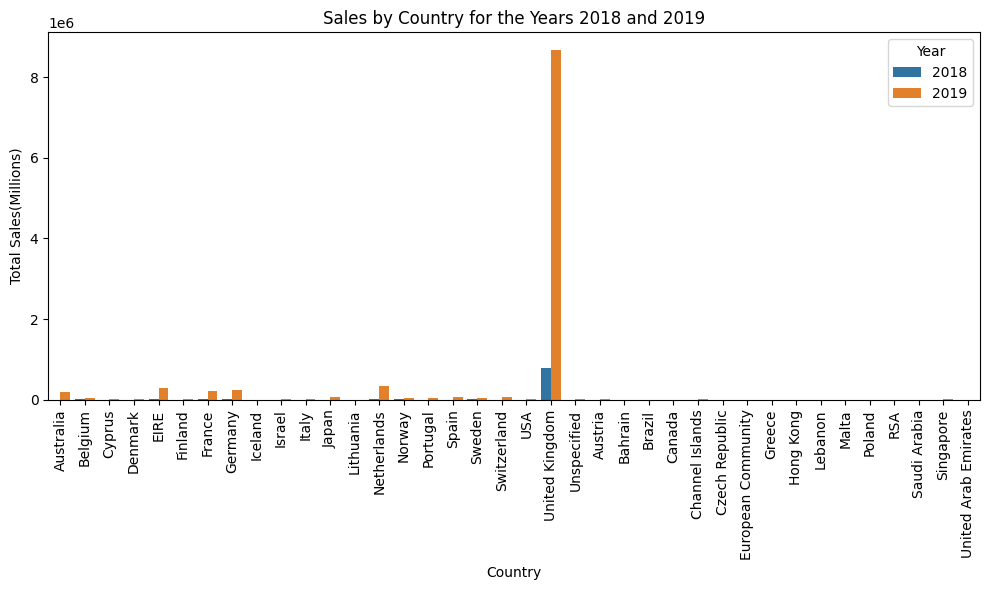

In [ ]:
# Extract year from Date column
df = df.withColumn("Year", substring(col("Date"), 1, 4))

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Aggregate total sales by country and year
sales_by_country = df_filtered.groupBy("Year", "Country").agg(
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("Year", "Country")

# Convert to Pandas DataFrame for plotting
pandas_df = sales_by_country.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x="Country", y="TotalSales", hue="Year", data=pandas_df)
plt.title("Sales by Country for the Years 2018 and 2019")
plt.xlabel("Country")
plt.ylabel("Total Sales(Millions)")
plt.legend(title="Year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Plot Sales Per Month


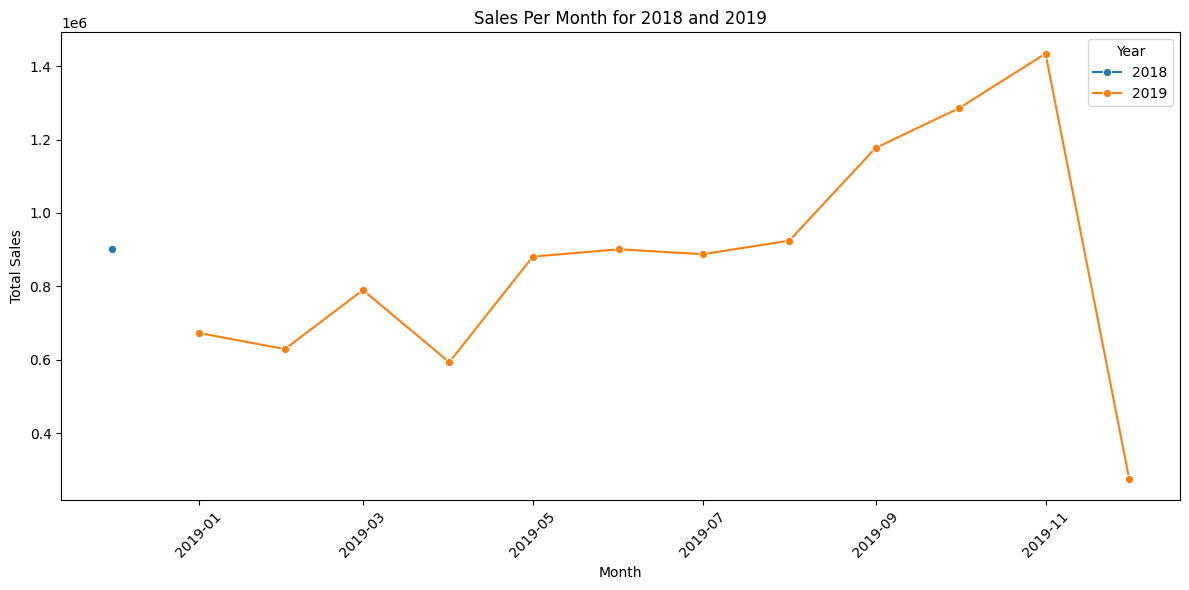

In [ ]:
import pandas as pd

# Extract year and month from Date column
df = df.withColumn("Year", substring(col("Date"), 1, 4)) \
       .withColumn("Month", substring(col("Date"), 6, 2))

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Calculate total sales per month
sales_per_month = df_filtered.groupBy("Year", "Month").agg(
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("Year", "Month")

# Convert to Pandas DataFrame for plotting
pandas_df = sales_per_month.toPandas()
pandas_df["Date"] = pd.to_datetime(pandas_df["Year"] + pandas_df["Month"], format="%Y%m")

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="TotalSales", hue="Year", marker="o", data=pandas_df)
plt.title("Sales Per Month for 2018 and 2019")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

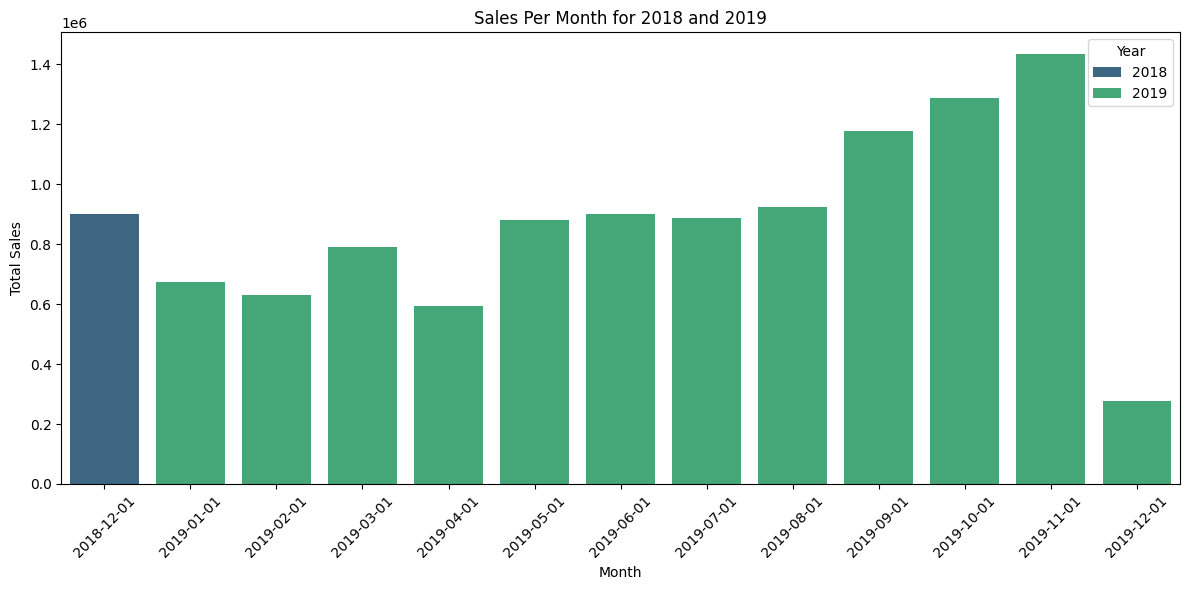

In [ ]:
# Extract year and month from Date column
df = df.withColumn("Year", substring(col("Date"), 1, 4)) \
       .withColumn("Month", substring(col("Date"), 6, 2))

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Calculate total sales per month
sales_per_month = df_filtered.groupBy("Year", "Month").agg(
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("Year", "Month")

# Convert to Pandas DataFrame for plotting
pandas_df = sales_per_month.toPandas()
pandas_df["Date"] = pd.to_datetime(pandas_df["Year"] + pandas_df["Month"], format="%Y%m")

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="Date", y="TotalSales", hue="Year", data=pandas_df, palette="viridis")
plt.title("Sales Per Month for 2018 and 2019")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 5 Customer by Sales for Year 2018 and 2019

<ipython-input-23-6d0bb4b701a6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CustomerNo", y="TotalSales", data=pandas_df, palette="viridis")


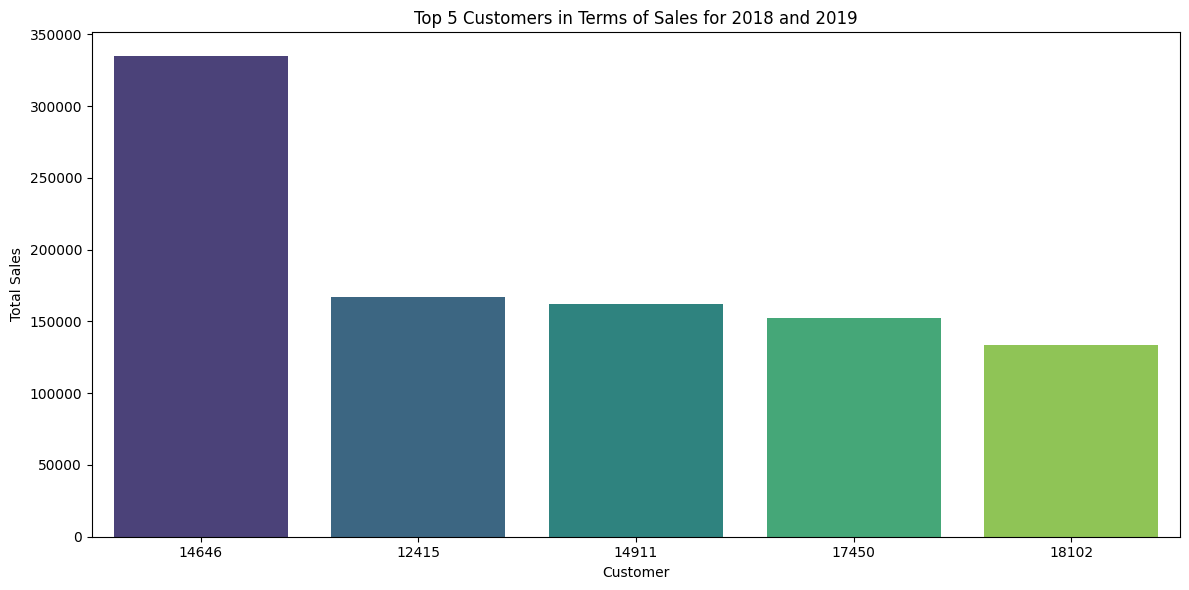

In [ ]:
# Extract year from Date column
df = df.withColumn("Year", substring(col("Date"), 1, 4))

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Calculate total sales by customer
sales_by_customer = df_filtered.groupBy("CustomerNo").agg(
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("TotalSales", ascending=False)

# Get top 5 customers
top_5_customers = sales_by_customer.limit(5)

# Convert to Pandas DataFrame for plotting
pandas_df = top_5_customers.toPandas()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="CustomerNo", y="TotalSales", data=pandas_df, palette="viridis")
plt.title("Top 5 Customers in Terms of Sales for 2018 and 2019")
plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

#Top 5 Country by Sales for 2018 and 2019

<ipython-input-24-1b282c11f0bf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="TotalSales", data=pandas_df, palette="viridis")


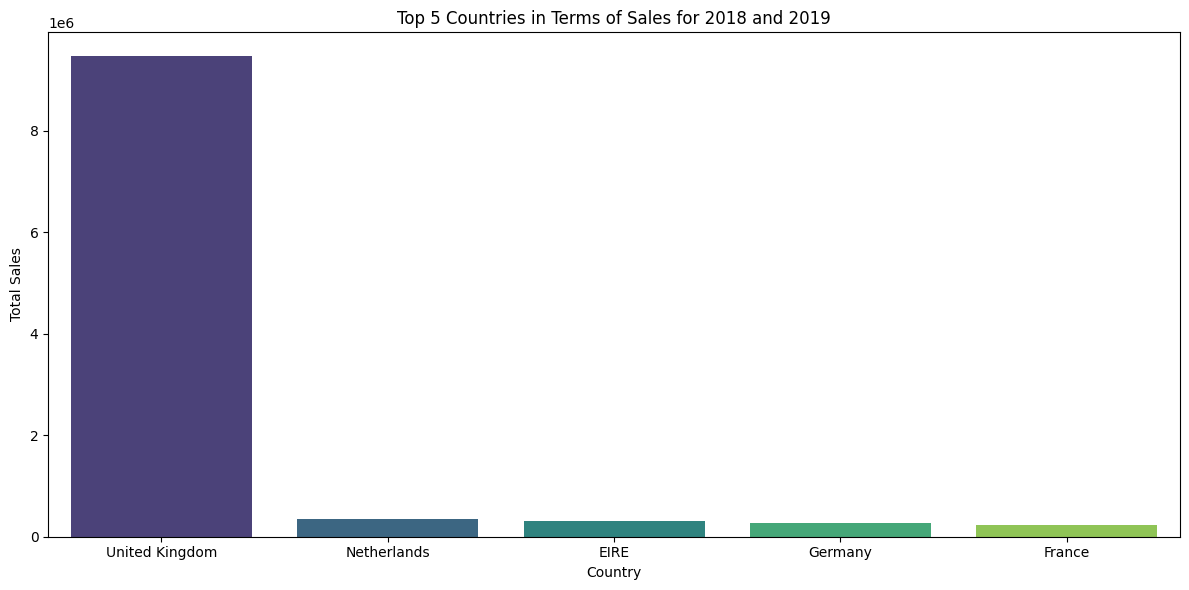

In [ ]:
# Extract year from Date column
df = df.withColumn("Year", substring(col("Date"), 1, 4))

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Calculate total sales by country
sales_by_country = df_filtered.groupBy("Country").agg(
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("TotalSales", ascending=False)

# Get top 5 countries
top_5_countries = sales_by_country.limit(5)

# Convert to Pandas DataFrame for plotting
pandas_df = top_5_countries.toPandas()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="TotalSales", data=pandas_df, palette="viridis")
plt.title("Top 5 Countries in Terms of Sales for 2018 and 2019")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

#Top 5 Product by Sales for 2018 and 2019

<ipython-input-25-883303f1d817>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProductName", y="TotalSales", data=pandas_df, palette="viridis")


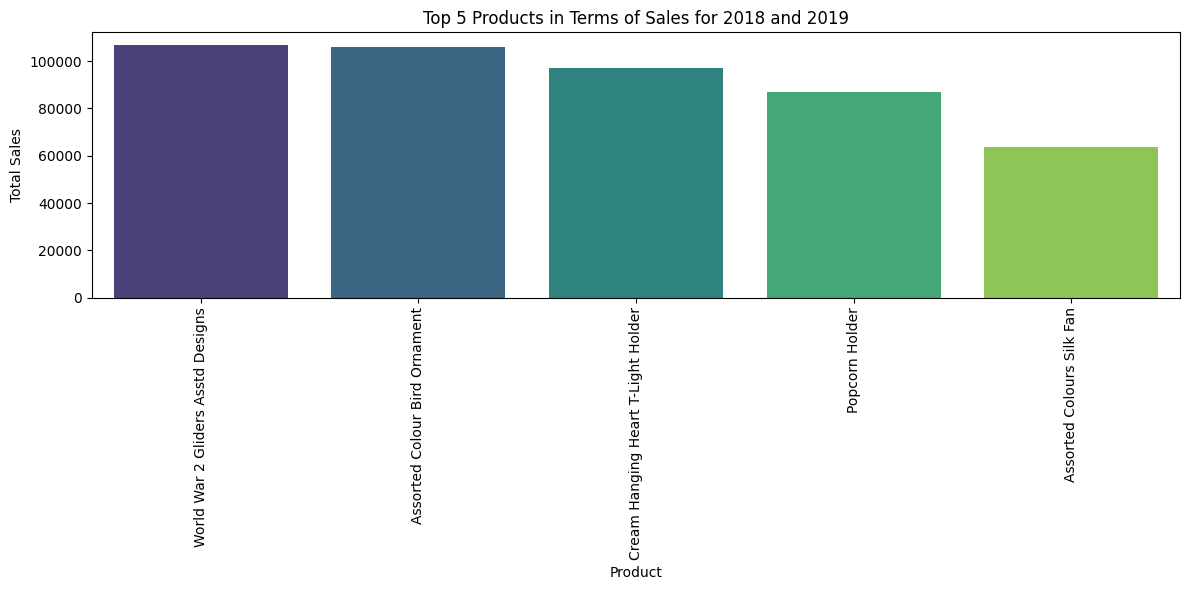

In [ ]:
# Extract year from Date column
df = df.withColumn("Year", substring(col("Date"), 1, 4))

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Calculate total sales by product
sales_by_product = df_filtered.groupBy("ProductName").agg(
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("TotalSales", ascending=False)

# Get top 5 products
top_5_products = sales_by_product.limit(5)

# Convert to Pandas DataFrame for plotting
pandas_df = top_5_products.toPandas()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="ProductName", y="TotalSales", data=pandas_df, palette="viridis")
plt.title("Top 5 Products in Terms of Sales for 2018 and 2019")
plt.xlabel("Product")
plt.ylabel("Total Sales")

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#Top 3 month which has highest sales for 2018 and 2019

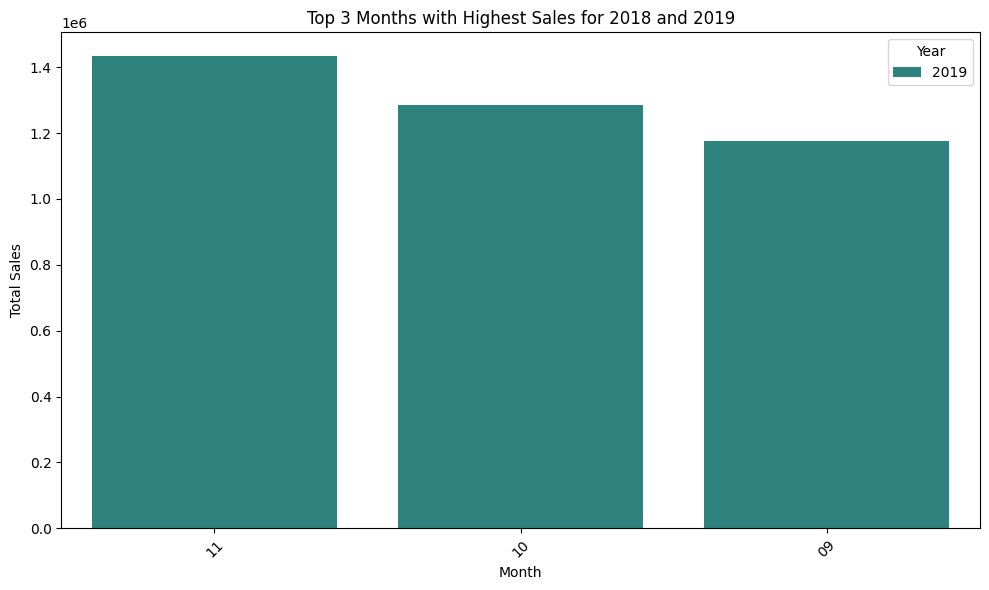

In [ ]:
# Extract year and month from Date column
df = df.withColumn("Year", substring(col("Date"), 1, 4)) \
       .withColumn("Month", substring(col("Date"), 6, 2))

# Filter for the years 2018 and 2019
df_filtered = df.filter((col("Year") == "2018") | (col("Year") == "2019"))

# Calculate total sales by month
sales_by_month = df_filtered.groupBy("Year", "Month").agg(
    round(spark_sum(col("Quantity") * col("Price")), 2).alias("TotalSales")
).orderBy("TotalSales", ascending=False)

# Get top 3 months with highest sales
top_3_months = sales_by_month.limit(3)

# Convert to Pandas DataFrame for plotting
pandas_df = top_3_months.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x="Month", y="TotalSales", hue="Year", data=pandas_df, palette="viridis")
plt.title("Top 3 Months with Highest Sales for 2018 and 2019")
plt.xlabel("Month")
plt.ylabel("Total Sales")

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

+---------+-------------+----------+
|ProductNo|TotalQuantity|TotalSales|
+---------+-------------+----------+
|    84077|        10298| 106799.99|
|    84879|         9173| 106082.54|
|   85123A|         7596|  97109.77|
|    22197|         8573|  86830.21|
|    15036|         5778|  63776.17|
|    22178|         5470|  61992.17|
|    22492|         5614|  60424.36|
|    21212|         5076|  54640.78|
|    23084|         4775|  54609.86|
|   85099B|         8728|  53672.32|
|    22616|         5127|  53557.47|
|    47566|         3246|   51143.6|
|    21977|         4642|  49123.88|
|    22423|         2144|  49041.05|
|    16014|         4692|  47446.58|
|    17003|         4358|   45845.4|
|    22086|         3392|  42528.99|
|    84946|         3710|  41014.91|
|    84991|         3825|  40697.36|
|    22151|         3814|  39558.66|
+---------+-------------+----------+
only showing top 20 rows

